In [250]:
import pandas as pd
import matplotlib
from os import listdir
warnings.filterwarnings("ignore")

df = pd.read_csv('less.csv')
df_new = pd.read_csv('less1.csv', names=['timestamp','symbol','side','size','price'])

In [55]:
df.drop(['side','size'], axis=1, inplace=True)
df_new.drop(['side','size'], axis=1, inplace=True)
df = pd.concat([df, df_new])

In [56]:
df = df[(df.symbol == "ETHUSD")]
df_eth = df
df_eth.price=df.price.astype(float)

In [57]:
df_eth.timestamp = df_eth.timestamp.str.replace("D", " ")

In [58]:
series = df_eth['timestamp'].to_list()
series = pd.to_datetime(series, format='%Y/%m/%d %H:%M:%S.%f')

In [59]:
df_eth.timestamp = series

In [60]:
df_eth.set_index('timestamp', inplace=True)

In [62]:
df_eth = df_eth.price.resample('4H').ohlc()

In [241]:
df_eth['Close'] = df_eth['close'].pct_change(periods=1).shift(1)
df_eth['Open'] = df_eth['open'].pct_change(periods=1).shift(-1)
df_eth['High'] = df_eth['low'].pct_change(periods=1).shift(-1)
df_eth['Low'] = df_eth['high'].pct_change(periods=1).shift(-1)
df_eth.head(10)

,level_0,index,timestamp,open,high,low,close,change,close_change,open_change,low_change,high_change,Close,Open,High,Low,Date
0,0,0,2021-01-01 00:00:00,737.35,738.80,737.35,738.80,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,2021-01-01 00:00:00
1,1,1,2021-01-01 04:00:00,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,2021-01-01 04:00:00
2,2,2,2021-01-01 08:00:00,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-01-01 08:00:00
3,3,3,2021-01-01 12:00:00,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-01-01 12:00:00
4,4,4,2021-01-01 16:00:00,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-01-01 16:00:00
5,5,5,2021-01-01 20:00:00,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.008883,-0.028548,-0.002369,2021-01-01 20:00:00
6,6,6,2021-01-02 00:00:00,730.80,737.05,716.30,732.30,-0.008798,-0.008798,-0.008883,-0.028548,-0.002369,0.000000,0.002600,0.017939,0.008819,2021-01-02 00:00:00
7,7,7,2021-01-02 04:00:00,732.70,743.55,729.15,738.65,0.008671,0.008671,0.002600,0.017939,0.008819,-0.008798,0.007984,-0.005554,-0.002824,2021-01-02 04:00:00
8,8,8,2021-01-02 08:00:00,738.55,741.45,725.10,732.50,-0.008326,-0.008326,0.007984,-0.005554,-0.002824,0.008671,-0.008395,0.008413,0.050779,2021-01-02 08:00:00
9,9,9,2021-01-02 12:00:00,732.35,779.10,731.20,773.95,0.056587,0.056587,-0.008395,0.008413,0.050779,-0.008326,0.056735,0.051901,0.018932,2021-01-02 12:00:00


<AxesSubplot:xlabel='timestamp'>

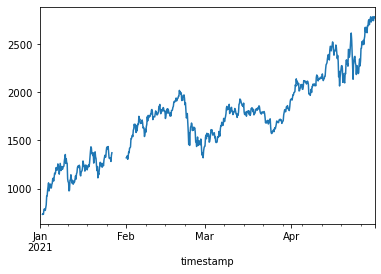

In [70]:
df_eth.close.plot()

In [71]:
import numpy as np
q = []
x = 1
import random

def test(f):
    global x
    i = 1
    z = x
    while i < df_eth.change.count():
        if df_eth.change[i-1] > f:
            #print(df_eth.change[i])
            z = z + 1
            x = x + 1
        z = df_eth.change[i] * z + z
        
        i = i + 1
        q.append(z)
    #print(x)
    return q


#for i in np.arange(-0.06, 0.06, 0.001):
#    outcome = pd.Series([0] + test(i))
#    print(int((outcome.max()/ x ) *100) ,"%", i)
    
outcome = pd.Series([0] + test(0.0))
#print(outcome)

170 %


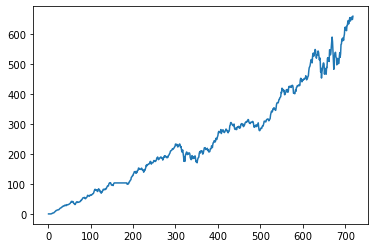

In [72]:
outcome[1:].plot()
print(int((outcome.max()/ x * 100)) ,"%")

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
ADF(df_eth.change.dropna())

(-28.505710790560364, 0.0, 0, 718, {'1%': -2.5688609631365367, '5%': -1.941380537693546, '10%': -1.6164552795875549}, -3178.0706879835416)


False

In [98]:
def ADF(v, crit='5%', max_d=6, reg='nc', autolag='AIC'):

    """ Augmented Dickey Fuller test

    Parameters
    ----------
    v: ndarray matrix
        residuals matrix

    Returns
    -------
    bool: boolean
        true if v pass the test 
    """

    boolean = False

    
    adf = adfuller(v, max_d, reg, autolag)
    print(adf)
    if(adf[0] < adf[4][crit]):
        pass
    else:
        boolean = True

    return boolean

def get_johansen(y, p):
        """
        Get the cointegration vectors at 95% level of significance
        given by the trace statistic test.
        """

        N, l = y.shape
        jres = coint_johansen(y, 0, p)
        trstat = jres.lr1                       # trace statistic
        tsignf = jres.cvt                       # critical values

        for i in range(l):
            if trstat[i] > tsignf[i, 1]:     # 0: 90%  1:95% 2: 99%
                r = i + 1
        jres.r = r
        jres.evecr = jres.evec[:, :r]

        return jres

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:>

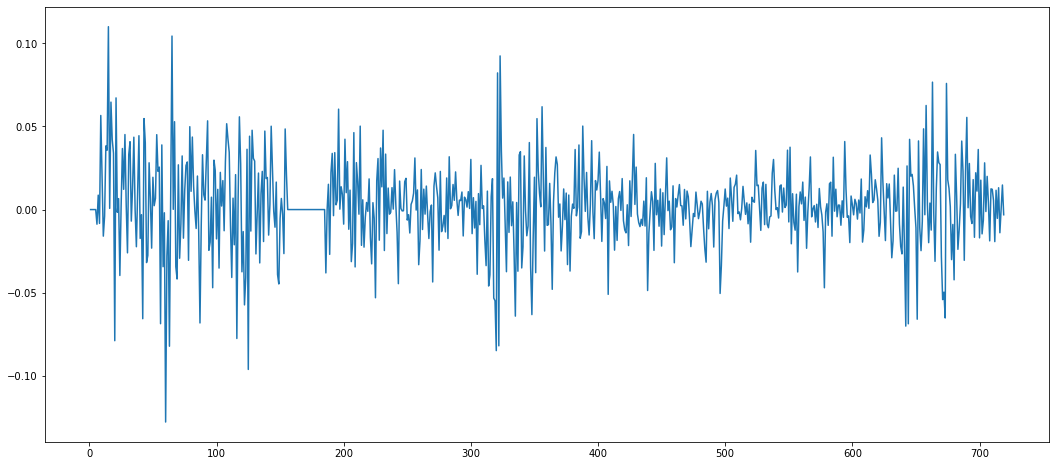

In [251]:
%pylab inline
warnings.filterwarnings("ignore")
pylab.rcParams['figure.figsize'] = (18.0, 8.0)
df_eth.change.plot()

In [76]:
from fbprophet import Prophet
df1 = pd.DataFrame()
df1['ds'] = df_eth.index
df1['y'] = df_eth.change.to_list()

Importing plotly failed. Interactive plots will not work.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


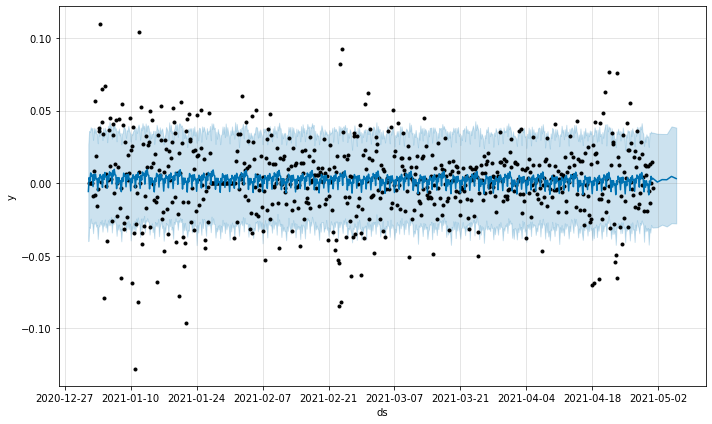

In [77]:
m = Prophet()
m.fit(df1)
future = m.make_future_dataframe(periods=5)
future.tail()
forecast = m.predict(future)
fig1 = m.plot(forecast)

In [95]:
df_eth[['change','close']]

,change,close
0,NaN,738.80
1,0.000000,NaN
2,0.000000,NaN
3,0.000000,NaN
4,0.000000,NaN
...,...,...
715,0.013126,2782.50
716,-0.013944,2743.70
717,0.000182,2744.20
718,0.014777,2784.75


In [119]:
#df_eth.reset_index(inplace=True)
y = df_eth[['change','close','open']].dropna()
p=1
jres=get_johansen(y,p)
print("There are ", jres.r, "cointegration vectors")
v1 = jres.evecr[:,0]
v2 = jres.evecr[:,1]
print (v1)
print (v2)

There are  2 cointegration vectors
[13.41717163  0.43840784 -0.43826341]
[-1.95208035e+02  8.04029027e-02 -8.09382450e-02]


In [102]:
v1/-v1[1]

array([-3.51252402e+05, -1.00000000e+00])

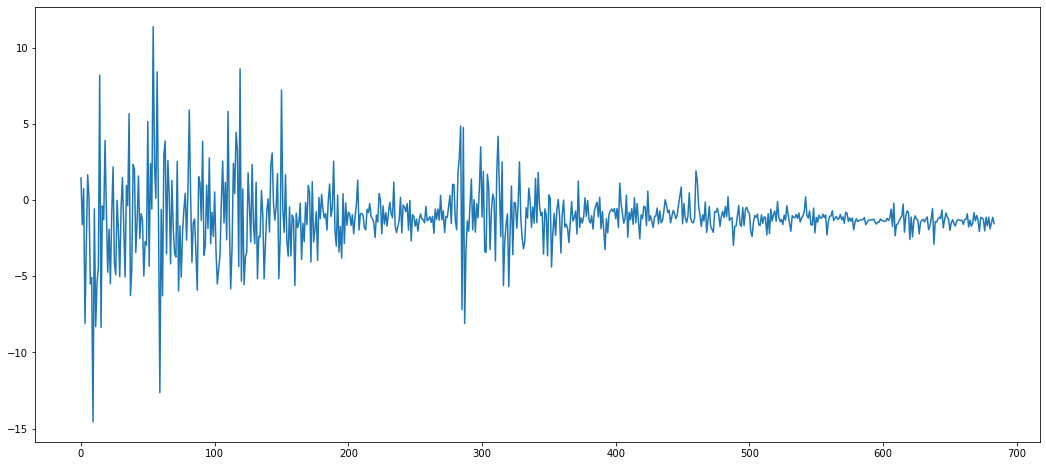

In [123]:
plot(np.dot(y.to_numpy(),v2))

<AxesSubplot:>

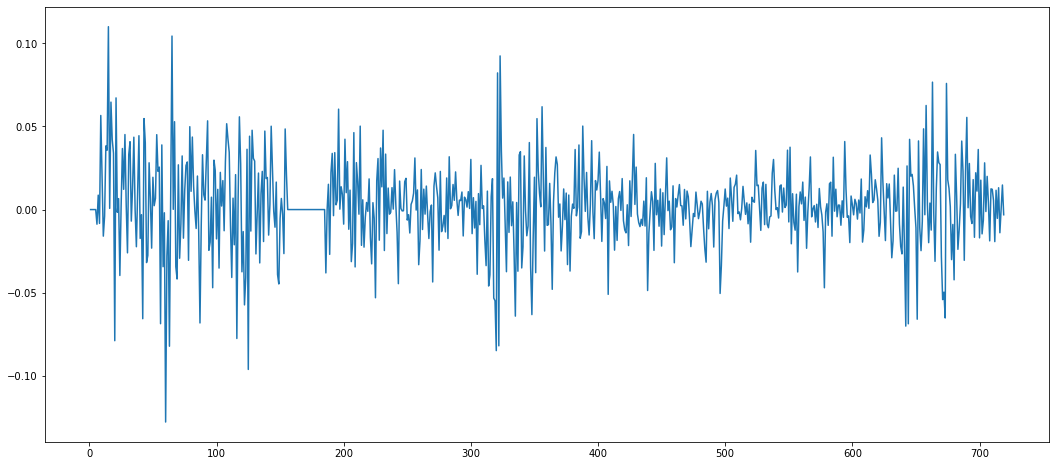

In [112]:
df_eth.change.dropna().plot()

In [242]:
import warnings
import logging
import itertools
import pandas as pd
import numpy as np
#from pandas_datareader import data
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import argparse
import sys
import os
from datetime import timedelta

# Suppress warning in hmmlearn
warnings.filterwarnings("ignore")


class HMMStockPredictor:
    def __init__(self, data, company, start_date, end_date, future_days, test_size=0.33,
                 n_hidden_states=4, n_latency_days=10,
                 n_intervals_frac_change=50, n_intervals_frac_high=10,
                 n_intervals_frac_low=10):
        self.data = data
        self._init_logger()
        self.company = company
        self.start_date = start_date
        self.end_date = end_date
        self.n_latency_days = n_latency_days
        self.hmm = GaussianHMM(n_components=n_hidden_states)
        self._split_train_test_data(test_size)
        self._compute_all_possible_outcomes(
            n_intervals_frac_change, n_intervals_frac_high, n_intervals_frac_low)
        self.predicted_close = None
        self.days_in_future = future_days

    def _init_logger(self):
        self._logger = logging.getLogger(__name__)
        handler = logging.StreamHandler()
        formatter = logging.Formatter(
            '%(asctime)s %(name)-12s %(levelname)-8s %(message)s')
        handler.setFormatter(formatter)
        self._logger.addHandler(handler)
        self._logger.setLevel(logging.DEBUG)

    def _split_train_test_data(self, test_size):
        """Downloads data and splits it into training and testing datasets."""
        # Use pandas_reader.data.DataReader to load the required financial data. Checks if the stock entry is valid.
        try:
            used_data = self.data #data.DataReader(self.company, 'yahoo', self.start_date, self.end_date)
        except IOError:
            print("Invalid stock selection. Please try again with a stock that is available on Yahoo finance.")
            sys.exit()
        # Do not shuffle the data as it is a time series
        _train_data, test_data = train_test_split(
            used_data, test_size=test_size, shuffle=False)
        self.train_data = _train_data
        self.test_data = test_data

        # Drop the columns that aren't used
        # self.train_data = self.train_data.drop(['Volume', 'Adj Close'], axis=1)
        # self.test_data = self.test_data.drop(['Volume', 'Adj Close'], axis=1)

        # Set days attribute
        self.days = len(test_data)

    @staticmethod
    def _extract_features(data):
        """Extract the features - open, close, high, low price - from the Yahooo finance generated dataframe."""
        open_price = np.array(data['Open'])
        close_price = np.array(data['Close'])
        high_price = np.array(data['High'])
        low_price = np.array(data['Low'])

        # We compute the fractional change in high,low and close prices to use as our set of observations
        frac_change = (close_price - open_price) / open_price
        frac_high = (high_price - open_price) / open_price
        frac_low = (open_price - low_price) / open_price

        # Put the observations into one array
        
        return np.column_stack((frac_change, frac_high, frac_low))
        
    def fit(self):
        """Fit the continuous emission Gaussian HMM."""
        #self._logger.info('>>> Extracting Features')
        observations = HMMStockPredictor._extract_features(self.train_data)
        #self._logger.info('Features extraction Completed <<<')
        # Fit the HMM using the fit feature of hmmlearn
        self.hmm.fit(observations)

    def _compute_all_possible_outcomes(self, n_intervals_frac_change, n_intervals_frac_high, n_intervals_frac_low):
        """Creates np arrays with evenly  spaced numbers for each range."""
        frac_change_range = np.linspace(-0.1, 0.1, n_intervals_frac_change)
        frac_high_range = np.linspace(-0.1, 0.1, n_intervals_frac_high)
        frac_low_range = np.linspace(-0.1, 0.1, n_intervals_frac_low)

        self._possible_outcomes = np.array(list(itertools.product(
            frac_change_range, frac_high_range, frac_low_range)))

    def _get_most_probable_outcome(self, day_index):
        """
        Using the fitted HMM, calculate the most probable outcome for a given day (e.g. prices will rise by 0.01).
        :param day_index: Current day index
        :return: The HMM's predicted movements in frac_change, frac_high, frac_low
        """
        # Use the previous n_latency_days worth of data for predictions
        previous_data_start_index = max(0, day_index - self.n_latency_days)
        previous_data_end_index = max(0, day_index - 1)
        previous_data = self.test_data.iloc[previous_data_start_index: previous_data_end_index]
        previous_data_features = HMMStockPredictor._extract_features(
            previous_data)
    
        outcome_score = []

        # Score all possible outcomes and select the most probable one to use for prediction
        for possible_outcome in self._possible_outcomes:
            total_data = np.row_stack(
                (previous_data_features, possible_outcome))
            outcome_score.append(self.hmm.score(total_data))

        # Get the index of the most probable outcome and return it
        most_probable_outcome = self._possible_outcomes[np.argmax(
            outcome_score)]

        return most_probable_outcome

    def predict_close_price(self, day_index):
        """Predict close price for a given day."""
        open_price = self.test_data.iloc[day_index]['Open']
        predicted_frac_change, pred_frac_high, pred_frac_low = self._get_most_probable_outcome(
            day_index)
        return open_price * (1 + predicted_frac_change)

    def predict_close_prices_for_period(self):
        """
        Predict close prices for the testing period.
        :return: List object of predicted close prices
        """
        predicted_close_prices = []
        print("Predicting Close prices from " + str(self.test_data.index[0]) + " to " + str(self.test_data.index[-1]))
        for day_index in range(self.days): #tqdm(range(self.days)):
            predicted_close_prices.append(self.predict_close_price(day_index))
        self.predicted_close = predicted_close_prices
        return predicted_close_prices

    def real_close_prices(self):
        """"Store and return the actual close prices."""
        actual_close_prices = self.test_data.loc[:, ['Close']]
        return actual_close_prices

    def add_future_days(self):
        """
        Add rows to the test data dataframe for the future days being predicted with accurate days. The rows are left
        with NaN values for now as they will be populated whilst predicting.
        """
        last_day = self.test_data.index[-1] + timedelta(days=self.days_in_future)

        # Create a new df with future days x days in the future based off the -f input. Concat the new df with
        # self.test_data.
        future_dates = pd.date_range(self.test_data.index[-1] + pd.offsets.DateOffset(1), last_day)
        second_df = pd.DataFrame(index=future_dates, columns=['High', 'Low', 'Open', 'Close'])
        self.test_data = pd.concat([self.test_data, second_df])

        # Replace the opening price for the first day in the future with the close price of the previous day
        self.test_data.iloc[self.days]['Open'] = self.test_data.iloc[self.days-1]['Close']

    def predict_close_price_fut_days(self, day_index):
        """
        Predict the close prices for the days in the future beyond the available data and populate the DF accordingly.
        :param day_index - index in DF for  current day being predicted.
        :return: Predicted close price for given day.
        """
        open_price = self.test_data.iloc[day_index]['Open']

        # Calculate the most likely fractional changes using the trained HMM
        predicted_frac_change, pred_frac_high, pred_frac_low = self._get_most_probable_outcome(
            day_index)
        predicted_close_price = open_price * (1 + predicted_frac_change)

        # Fill in the dataframe based on predictions
        self.test_data.iloc[day_index]['Close'] = predicted_close_price
        self.test_data.iloc[day_index]['High'] = open_price * (1 + pred_frac_high)
        self.test_data.iloc[day_index]['Low'] = open_price * (1 - pred_frac_low)

        return predicted_close_price

    def predict_close_prices_for_future(self):
        """
        Calls the "predict_close_price_fut_days" function for each day in the future to predict future close prices.
        """
        predicted_close_prices = []
        future_indices = len(self.test_data) - self.days_in_future
        print("Predicting future Close prices from " + str(self.test_data.index[future_indices]) +
              " to " + str(self.test_data.index[-1]))

        # Iterate over only the final x days in the test data dataframe.
        for day_index in range(future_indices, len(self.test_data)): #tqdm(range(future_indices, len(self.test_data))):
            predicted_close_prices.append(self.predict_close_price_fut_days(day_index))
            # Replace the next days Opening price (which is currently NaN) with the previous days predicted close price
            try:
                self.test_data.iloc[day_index+1]['Open'] = self.test_data.iloc[day_index]['Close']
            except IndexError:
                continue

        # Return the predicted close prices
        self.predicted_close = predicted_close_prices

        return predicted_close_prices

In [243]:
def plot_results(in_df, out_dir, stock_name):
    """
    Plots the results for historical predictions
    :param in_df: Pandas Dataframe containing the data, actual close prices, and predicted close prices
    :param out_dir: Output directory
    :param stock_name: Stock name found in original input
    :return: Plot comparing the two sets of data is shown and saved.
    """
    in_df = in_df.reset_index()  # Required for plotting
    ax = plt.gca()
    in_df.plot(kind='line', x='Date', y='Actual_Close', ax=ax)
    in_df.plot(kind='line', x='Date', y='Predicted_Close', color='red', ax=ax)
    plt.ylabel('Daily Close Price (in USD)')
    plt.title(str(stock_name) + ' daily closing stock prices')
    #save_dir = f"{out_dir}/{stock_name}_results_plot.png"
    #plt.savefig(save_dir)
    plt.show()
    plt.close('all')


def check_bool(boolean):
    """
    Corrects an issue that argparser has in which it treats False inputs for a boolean argument as True.
    """
    if isinstance(boolean, bool):
        return boolean
    if boolean.lower() in ('yes', 'true', 't', 'y', '1'):
        return True
    elif boolean.lower() in ('no', 'false', 'f', 'n', '0'):
        return False
    else:
        raise argparse.ArgumentTypeError('Boolean value expected.')

def calc_mse(input_df):
    """
    Calculates the Mean Squared Error between real and predicted close prices
    :param input_df: Pandas Dataframe containing the data, actual close prices, and predicted close prices
    :return: Mean Squared Error
    """
    actual_arr = (input_df.loc[:, "Actual_Close"]).values
    pred_arr = (input_df.loc[:, "Predicted_Close"]).values
    mse = mean_squared_error(actual_arr, pred_arr)
    return mse


def main():
    # Set variables from arguments
    company_name = "X"
    start = df_eth.timestamp.min()
    end = df_eth.timestamp.max()
    future = 10
    metrics = True
    plot = True
    out_dir = "./"

    print("Using continuous Hidden Markov Models to predict stock prices or 4h-ourly return for " + str(company_name))

    # Initialise HMMStockPredictor object and fit the HMM
    stock_predictor = HMMStockPredictor(data=df_test, company=company_name, start_date=start, end_date=end, future_days=future)
    print("Training data period is from " + str(stock_predictor.train_data.index[0]) + " to " + str(
        stock_predictor.train_data.index[-1]))
    stock_predictor.fit()

    # Get the predicted and actual stock prices and create a DF for saving if you'd like to get a metric for the model
    if metrics:
        predicted_close = stock_predictor.predict_close_prices_for_period()
        actual_close = stock_predictor.real_close_prices()
        actual_close["Predicted_Close"] = predicted_close
        output_df = actual_close.rename(columns={"Close": "Actual_Close"})

        # Calculate Mean Squared Error and save
        mse = calc_mse(output_df)
        #print(mse)
        #out_name = f"{out_dir}/{company_name}_HMM_Prediction_{str(round(mse, 6))}.xlsx"
        #output_df.to_excel(out_name)  # Requires openpyxl installed
        print("All predictions saved. The Mean Squared Error for the " + str(
            stock_predictor.days) + " days considered is: " + str(mse))

        # Plot and save results if plot is True
        if plot:
            plot_results(output_df, out_dir, company_name)

    # Predict for x days into the future
    if future is not None:
        stock_predictor.add_future_days()
        future_pred_close = stock_predictor.predict_close_prices_for_future()
        print("The predicted stock prices or return for the next " + str(future) + ' days/4hs from '
              + str(stock_predictor.end_date) + ' are: ', future_pred_close)

        #out_final = f"{out_dir}/{company_name}_HMM_Predictions_{future}_days_in_future.xlsx"
        #stock_predictor.test_data.to_excel(out_final)  # Requires openpyxl installed
        print("The full set of predictions has been saved, including the High, Low, Open and Close prices for "
              + str(future) + " days in the future.")
    return output_df, future_pred_close

Using continuous Hidden Markov Models to predict stock prices or 4h-ourly return for X
Training data period is from 2021-01-02 04:00:00 to 2021-03-24 00:00:00
Predicting Close prices from 2021-03-24 04:00:00 to 2021-04-30 16:00:00
All predictions saved. The Mean Squared Error for the 224 days considered is: 0.0008855898630430218


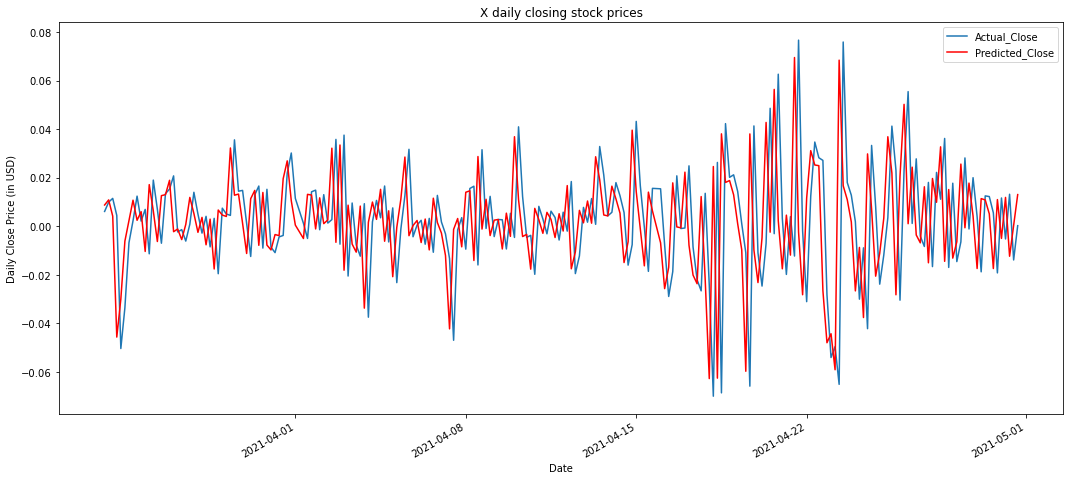

Predicting future Close prices from 2021-05-01 16:00:00 to 2021-05-10 16:00:00
The predicted stock prices or return for the next 10 days/4hs from 2021-04-30 20:00:00 are:  [0.0001640121004483186, 0.00014761089040348676, 0.00013284980136313808, 0.00011956482122682428, 0.00010760833910414185, 9.684750519372767e-05, 8.716275467435491e-05, 7.844647920691943e-05, 7.060183128622749e-05, 6.354164815760474e-05]
The full set of predictions has been saved, including the High, Low, Open and Close prices for 10 days in the future.


In [244]:
df_eth['Date'] = df_eth['timestamp']
df_test = df_eth[['Date','Open','High','Close','Low']].dropna(how='all')
df_test = df_test[(df_test != 0).all(1)].dropna().set_index('Date')
df_test.columns = df_test.columns.str.capitalize()
output_df, future = main()

<AxesSubplot:xlabel='Date'>

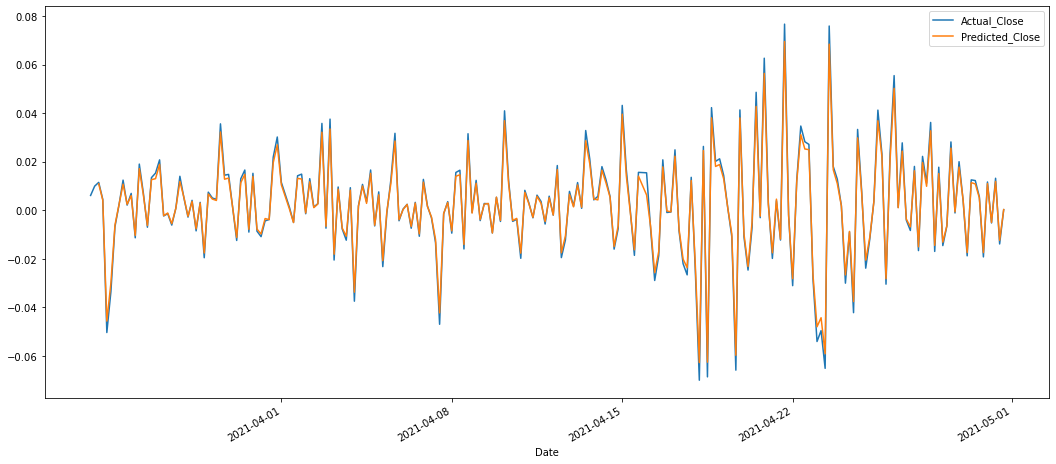

In [248]:
output_df['Predicted_Close'] = output_df['Predicted_Close'].shift(2)
output_df.plot()

In [249]:
output_df.tail(50)

,Actual_Close,Predicted_Close
Date,,
2021-04-22 12:00:00,0.028173,0.025187
2021-04-22 16:00:00,0.027087,0.024908
2021-04-22 20:00:00,-0.028247,-0.026577
2021-04-23 00:00:00,-0.054141,-0.048053
2021-04-23 04:00:00,-0.049666,-0.044341
2021-04-23 08:00:00,-0.065201,-0.059185
2021-04-23 12:00:00,0.075862,0.068389
2021-04-23 16:00:00,0.017960,0.016634
2021-04-23 20:00:00,0.012746,0.010908


<AxesSubplot:>

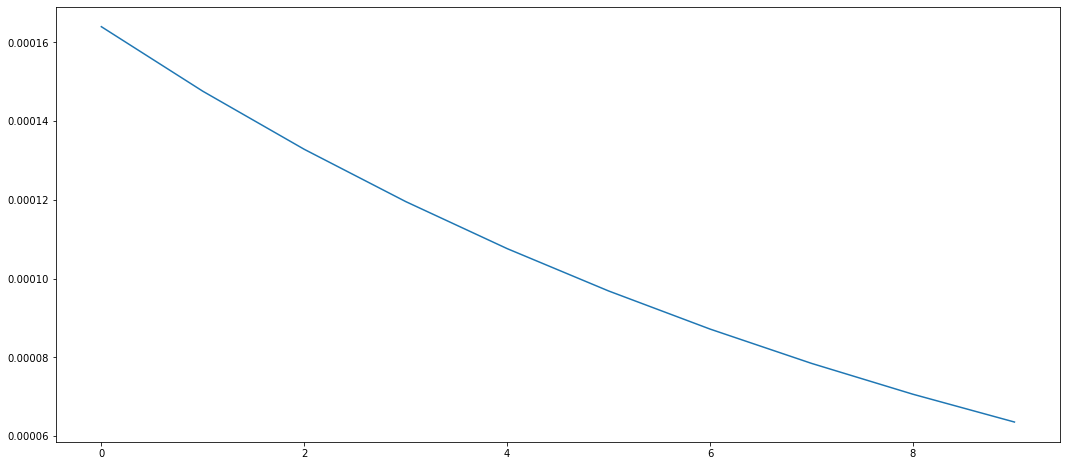

In [247]:
pd.Series(future).plot()